# problem2

In [25]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

np.random.seed(777)

proximal gradient method

In [26]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

In [27]:
def st_ops(mu, q):
    x_proj = np.zeros(mu.shape)
    for i in range(len(mu)):
        if mu[i] > q:
            x_proj[i] = mu[i] - q
        else:
            if np.abs(mu[i]) < q:
                x_proj[i] = 0
            else:
                x_proj[i] = mu[i] + q
    return x_proj

lambda=2 w_hat=[[0.8181818181818182], [1.0909090909090904]]
lambda=4 w_hat=[[0.6363636363636365], [0.18181818181818155]]
lambda=6 w_hat=[[0.33333333333333337], [0.0]]


Text(0, 0.5, 'diff from w_hat')

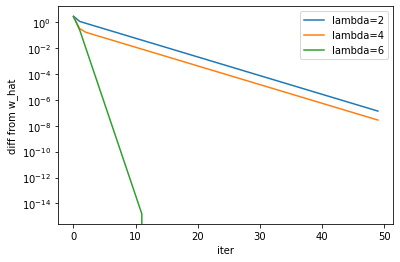

In [28]:
lams = [2,4,6]
show_iter = 50


for lam in lams:
    ### implement PG ###
    w_init = np.array([[ 3],
                       [-1]])
    L = np.max(np.linalg.eig(2 * A)[0])

    wt_history = []
    wt = w_init
    for t in range(1000):
        wt_history.append(wt)
        grad = 2 * A @ (wt-mu)
        wt1 = wt - 1/L * grad
        wt = st_ops(wt1, lam * 1 / L)
    ###

    w_hat = wt
    print('lambda='+str(lam), 'w_hat='+str(w_hat.tolist()))
    wt_history = np.hstack(wt_history)

    wt_what_history = wt_history - w_hat
    wt_what_history = np.linalg.norm(wt_what_history, axis=0)

    plt.plot(wt_what_history[:show_iter], label='lambda='+str(lam))

plt.legend()
plt.yscale('log')
plt.xlabel('iter')
plt.ylabel('diff from w_hat')

(-1.5, 3.0)

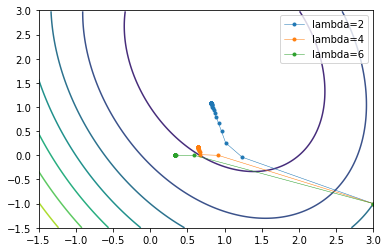

In [29]:
lams = [2,4,6]
show_iter = 50

x_1 = np.arange(-1.5, 3, 0.01)
x_2 = np.arange(-1.5, 3, 0.02)

X1, X2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
fValue = np.zeros((len(x_1), len(x_2)))

for i in range(len(x_1)):
  for j in range(len(x_2)):
        inr = np.vstack([x_1[i], x_2[j]])
        fValue[i, j] = (inr-mu).T @ A @ (inr- mu)

plt.contour(X1, X2, fValue)

for lam in lams:
    ### implement PG ###
    w_init = np.array([[ 3],
                       [-1]])
    L = np.max(np.linalg.eig(2 * A)[0])

    wt_history = []
    wt = w_init
    for t in range(1000):
        wt_history.append(wt)
        grad = 2 * A @ (wt-mu)
        wt1 = wt - 1/L * grad
        wt = st_ops(wt1, lam * 1 / L)
    ###
    wt_history = np.hstack(wt_history)
    plt.plot(wt_history[0,:], wt_history[1,:], 'o-', markersize=3, linewidth=0.5, label='lambda='+str(lam))

plt.legend()
plt.xlim(-1.5, 3)
plt.ylim(-1.5, 3)

convex optimization

In [30]:
lams = [2,4,6]

for lam in lams:
    w_lasso = cv.Variable((2,1))
    obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
    objective = cv.Minimize(obj_fn)
    constraints = []
    prob = cv.Problem(objective, constraints)
    result = prob.solve(solver=cv.CVXOPT)
    w_lasso = w_lasso.value
    print('lambda='+str(lam), 'w_hat='+str(w_lasso.tolist()))

lambda=2 w_hat=[[0.8181712040240958], [1.0908558468877623]]
lambda=4 w_hat=[[0.6363217485426086], [0.18179889874891772]]
lambda=6 w_hat=[[0.33288251457299434], [-2.569518213652835e-08]]
